In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/kyoto.csv', header=None, index_col=0)

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1.00,2.865,2.842,2.765,2.808,2.812,2.798,2.542,2.508,2.544,2.504,2.536,2.510
0.50,2.522,2.526,2.556,2.606,2.551,2.616,1.857,1.836,1.853,1.856,1.862,1.849
0.25,3.611,3.671,3.677,3.608,3.608,3.607,1.374,1.356,1.375,1.358,1.374,1.369
0.12,5.320,5.388,5.413,5.115,5.361,5.239,1.030,1.012,1.007,1.028,1.025,1.026
0.06,5.551,5.625,5.539,5.588,5.448,5.539,0.783,0.797,0.800,0.796,0.794,0.788
0.03,5.200,5.107,5.169,5.005,5.031,5.112,0.656,0.654,0.655,0.678,0.650,0.652
0.01,4.488,4.389,4.267,4.390,4.364,4.333,0.566,0.575,0.556,0.569,0.567,0.558
0.00,3.671,3.710,3.742,3.658,3.639,3.787,0.492,0.497,0.490,0.498,0.487,0.491


In [4]:
mmap = [1,2,3,4,5, 6]
snapshot = [7, 8, 9, 10, 11, 12]

df_mean = pd.DataFrame()
df_mean['mmap()'] = df[mmap].mean(axis=1)
df_mean['snapshot()'] = df[snapshot].mean(axis=1)
df_mean_orig = df_mean.copy(deep=True)
df_mean.index = ["%.0f" % val for val in 1/df_mean.index]

In [5]:
df_mean_orig

,mmap(),snapshot()
0,,
1.00,2.815000,2.524000
0.50,2.562833,1.852167
0.25,3.630333,1.367667
0.12,5.306000,1.021333
0.06,5.548333,0.793000
0.03,5.104000,0.657500
0.01,4.371833,0.565167
0.00,3.701167,0.492500


In [6]:
df_e_max = pd.DataFrame()
df_e_max['mmap()'] = df[mmap].max(axis=1)
df_e_max['snapshot()'] = df[snapshot].max(axis=1)
df_e_max = df_e_max.T - df_mean_orig.T

df_e_max

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),0.05,0.053167,0.046667,0.107000,0.076667,0.0960,0.116167,0.085833
snapshot(),0.02,0.009833,0.007333,0.008667,0.007000,0.0205,0.009833,0.005500


In [7]:
df_e_min = pd.DataFrame()
df_e_min['mmap()'] = df[mmap].min(axis=1)
df_e_min['snapshot()'] = df[snapshot].min(axis=1)
df_e_min = df_e_min.T - df_mean_orig.T
df_e_min

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),-0.05,-0.040833,-0.023333,-0.191000,-0.100333,-0.0990,-0.104833,-0.062167
snapshot(),-0.02,-0.016167,-0.011667,-0.014333,-0.010000,-0.0075,-0.009167,-0.005500


In [8]:
yerr_mmap = pd.DataFrame()
yerr_mmap = pd.DataFrame([df_e_min.T['mmap()'], df_e_max.T['mmap()']])
yerr_mmap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),-0.05,-0.040833,-0.023333,-0.191,-0.100333,-0.099,-0.104833,-0.062167
mmap(),0.05,0.053167,0.046667,0.107,0.076667,0.096,0.116167,0.085833


In [9]:
yerr_snap = pd.DataFrame()
yerr_snap = pd.DataFrame([df_e_min.T['snapshot()'], df_e_max.T['snapshot()']])
yerr_snap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
snapshot(),-0.02,-0.016167,-0.011667,-0.014333,-0.010,-0.0075,-0.009167,-0.0055
snapshot(),0.02,0.009833,0.007333,0.008667,0.007,0.0205,0.009833,0.0055


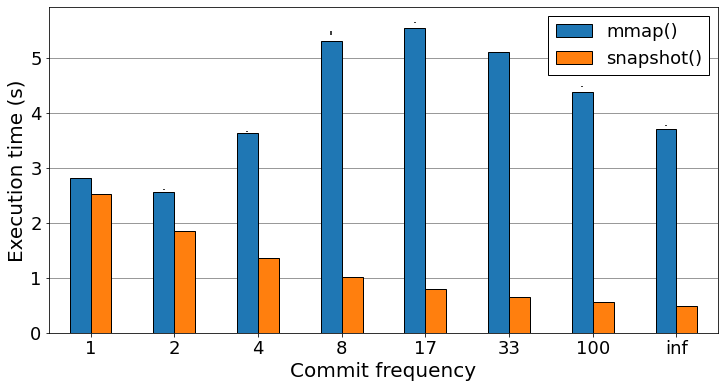

In [10]:
fontsize=18
figsize=(12, 6)
ax = df_mean.plot.bar(figsize=figsize, fontsize=fontsize, yerr = [yerr_mmap, yerr_snap], zorder=3,edgecolor='black')
ax.grid(axis='y', zorder=0, color='gray')
ax.set_xlabel("Commit frequency", fontsize=fontsize+2)
ax.set_ylabel("Execution time (s)", fontsize=fontsize+2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# print(ax.())
_=ax.legend(fontsize=fontsize, fancybox=False,edgecolor='black',facecolor='white',framealpha=1)